In this notebook, we present the results we obtained when running our NN with 4 different architectures, both for the original and modified parameterisation.

The 4 models have the following architecture (first input layer is ommited, all layers are dense layers):
 - model 1 : 32,16,8,4,2
 - model 2 : 128,64,32,16,2
 - model 3 : 512,256,128,64,32,16,2
 - model 4 : 1024,512,256,128,64,32,16,2
 
The NN predicts the two values of the velocity simultaneously. All the NN were trained for 25 epochs using Adam optimizer. The best model is then trained for an additional 50 epochs to make predictions (see notebook Predictions_test_set)

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from sklearn.utils import shuffle


## Load data

In [2]:
namefile = "DRIFT_DATA_TRAIN.csv"
df = pd.read_csv(namefile)

In [3]:
df['ice_mag'] = np.sqrt(df['u_buoy']**2 + df['v_buoy']**2 )
df['ice_dir'] = np.where(df['v_buoy']!= 0, np.arctan2(df['v_buoy'],df['u_buoy']), 0)
df['wind_mag'] = np.sqrt(df['u_ERA5']**2 + df['v_ERA5']**2 )
df['wind_dir'] = np.where(df['v_ERA5']!= 0, np.arctan2(df['v_ERA5'],df['u_ERA5']), 0)

In [4]:
df.head(5)

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,ice_mag,ice_dir,wind_mag,wind_dir
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,1.370671,2.191824,6.711849,-3.093710
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0.741408,0.520564,6.851881,-3.043036
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,1.187695,2.934923,8.896751,3.014921
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0.920127,0.028026,1.496117,-2.377247
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1.300527,1.273525,3.338513,2.278041


## Original parameterisation

### Preparing data / model / predictions

In [6]:
# Load the model's savestates created via Tensorflow
model_1 = tf.keras.models.load_model('NN_models/Model_1/model_1.h5')
model_2 = tf.keras.models.load_model('NN_models/Model_2/model_2.h5')
model_3 = tf.keras.models.load_model('NN_models/Model_3/model_3.h5')
model_4 = tf.keras.models.load_model('NN_models/Model_4/model_4.h5')

In [7]:
# Define the input / output features
# As the model was trained on scaled data it is necessary to scale them with the same values!
x = np.array(df[["u_ERA5","v_ERA5","x_EASE","y_EASE","sic_CDR","h_piomas","year","doy","d2c"]])
y = np.array(df[["u_buoy","v_buoy"]])

# Rescale the input features using the full dataset ( data is scaled as the NN was trained with scaled features ! )
mean_x = np.mean(x,axis=0)
variances_x = np.var(x,axis=0)
x_norm = (x - mean_x)/variances_x

In [8]:
# Get the predictions for all models 
y_predict_mod_1 = model_1.predict(x_norm)
y_predict_mod_2 = model_2.predict(x_norm)
y_predict_mod_3 = model_3.predict(x_norm)
y_predict_mod_4 = model_4.predict(x_norm)

### Values of MSE

In [9]:
# Get the value of the MSE for all models
print("Full data set MSE model 1 : ",mse(y_predict_mod_1,y))
print("Full data set MSE model 2 : ",mse(y_predict_mod_2,y))
print("Full data set MSE model 3 : ",mse(y_predict_mod_3,y))
print("Full data set MSE model 4 : ",mse(y_predict_mod_4,y))

Full data set MSE model 1 :  20.377055622709896
Full data set MSE model 2 :  18.444803505064602
Full data set MSE model 3 :  17.570956633731406
Full data set MSE model 4 :  17.499277581279856


### Visual inspections of predictions

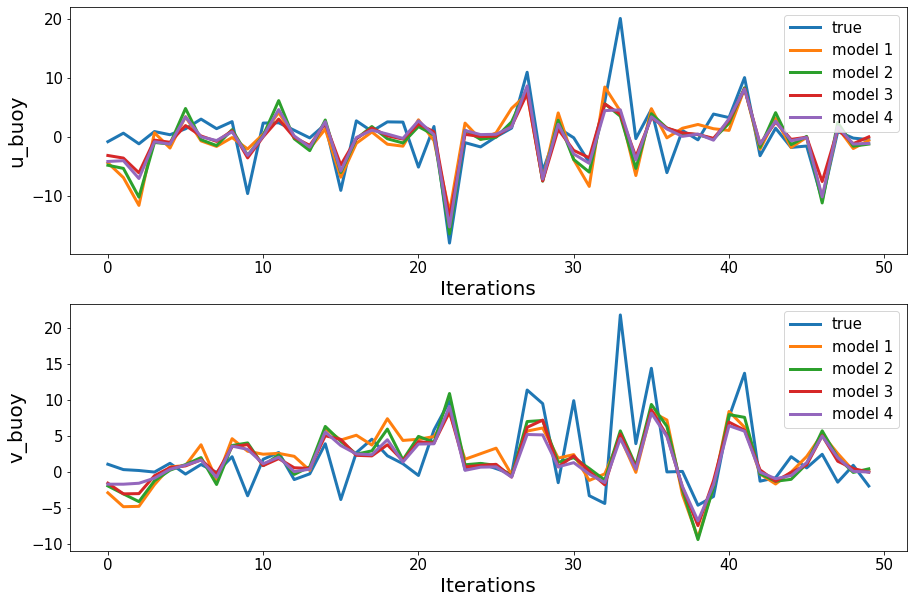

In [11]:
# Select the interval of points that you want to inspect (between 50 - 100 recommended)
beg = 0
end = 50

# Create matplotlib figure
fig, axes = plt.subplots(2, 1)

# Figure for u_buoy predictions
axes[0].plot(y.T[0][beg:end],linewidth = 3,label="true")
axes[0].plot(y_predict_mod_1.T[0][beg:end],linewidth = 3,label="model 1")
axes[0].plot(y_predict_mod_2.T[0][beg:end],linewidth = 3,label="model 2")
axes[0].plot(y_predict_mod_3.T[0][beg:end],linewidth = 3,label="model 3")
axes[0].plot(y_predict_mod_4.T[0][beg:end],linewidth = 3,label="model 4")

axes[0].legend(fontsize=15)
axes[0].set_xlabel("Iterations",fontsize=20)
axes[0].set_ylabel("u_buoy",fontsize=20)
axes[0].tick_params(labelsize=15)

# Figure for v_buoy predictions
axes[1].plot(y.T[1][beg:end],linewidth = 3,label="true")
axes[1].plot(y_predict_mod_1.T[1][beg:end],linewidth = 3,label="model 1")
axes[1].plot(y_predict_mod_2.T[1][beg:end],linewidth = 3,label="model 2")
axes[1].plot(y_predict_mod_3.T[1][beg:end],linewidth = 3,label="model 3")
axes[1].plot(y_predict_mod_4.T[1][beg:end],linewidth = 3,label="model 4")
axes[1].legend(fontsize=15)
axes[1].set_xlabel("Iterations",fontsize=20)
axes[1].set_ylabel("v_buoy",fontsize=20)
axes[1].tick_params(labelsize=15)

# change size figure
fig = plt.gcf()
fig.set_size_inches(15, 10)


## Other parameterisation


### Preparing model / data / predictions

In [12]:
# Load the model's savestates created via Tensorflow for the other parameterisation
model_1_op = tf.keras.models.load_model('NN_models/Model_1/model_1_op.h5')
model_2_op = tf.keras.models.load_model('NN_models/Model_2/model_2_op.h5')
model_3_op = tf.keras.models.load_model('NN_models/Model_3/model_3_op.h5')
model_4_op = tf.keras.models.load_model('NN_models/Model_4/model_4_op.h5')

In [13]:
# Define the input / output features
# As the model was trained on scaled data it is necessary to scale them with the same values!
x_op = np.array(df[["wind_mag","wind_dir","x_EASE","y_EASE","sic_CDR","h_piomas","year","doy","d2c"]])
y_op = np.array(df[["ice_mag","ice_dir"]])

# Rescale the input features using the full dataset ( data is scaled as the NN was trained with scaled features ! )
mean_x_op = np.mean(x_op,axis=0)
variances_x_op = np.var(x_op,axis=0)
x_norm_op = (x_op - mean_x_op)/variances_x_op

In [14]:
# Get the predictions for all models 
y_predict_mod_1_op = model_1_op.predict(x_norm_op)
y_predict_mod_2_op = model_2_op.predict(x_norm_op)
y_predict_mod_3_op = model_3_op.predict(x_norm_op)
y_predict_mod_4_op = model_4_op.predict(x_norm_op)

### MSE 

In [15]:
# Get the value of the MSE for all models
print("Full data set MSE model 1 : ",mse(y_predict_mod_1_op,y_op))
print("Full data set MSE model 2 : ",mse(y_predict_mod_2_op,y_op))
print("Full data set MSE model 3 : ",mse(y_predict_mod_3_op,y_op))
print("Full data set MSE model 4 : ",mse(y_predict_mod_4_op,y_op))

Full data set MSE model 1 :  13.636120087519306
Full data set MSE model 2 :  12.057698933634104
Full data set MSE model 3 :  11.738779632037197
Full data set MSE model 4 :  11.446027919802185


### Visual inspections of predictions

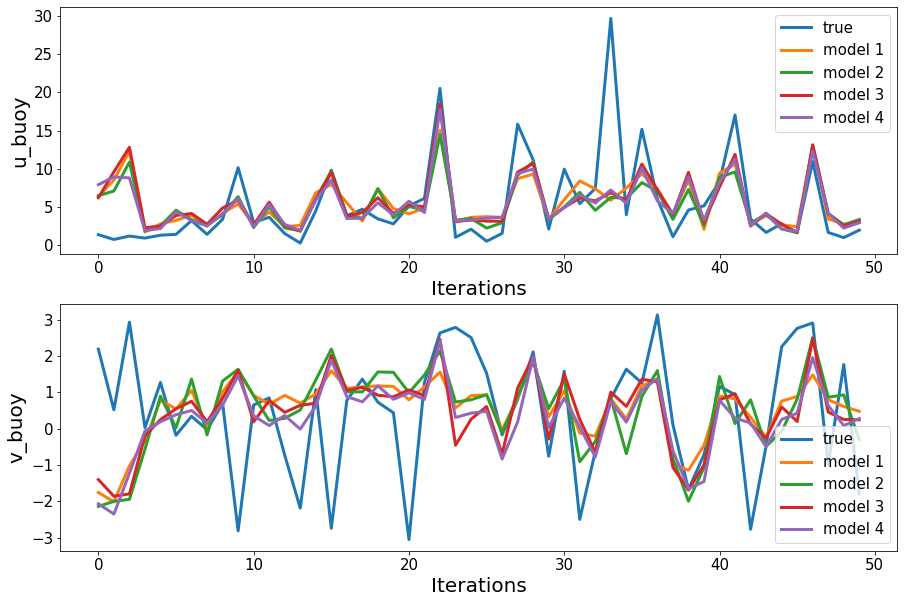

In [16]:
# Select the interval of points that you want to inspect (between 50 - 100 recommended)
beg = 0
end = 50

# Create matplotlib figure
fig, axes = plt.subplots(2, 1)

# Figure for u_buoy predictions
axes[0].plot(y_op.T[0][beg:end],linewidth = 3,label="true")
axes[0].plot(y_predict_mod_1_op.T[0][beg:end],linewidth = 3,label="model 1")
axes[0].plot(y_predict_mod_2_op.T[0][beg:end],linewidth = 3,label="model 2")
axes[0].plot(y_predict_mod_3_op.T[0][beg:end],linewidth = 3,label="model 3")
axes[0].plot(y_predict_mod_4_op.T[0][beg:end],linewidth = 3,label="model 4")

axes[0].legend(fontsize=15)
axes[0].set_xlabel("Iterations",fontsize=20)
axes[0].set_ylabel("u_buoy",fontsize=20)
axes[0].tick_params(labelsize=15)

# Figure for v_buoy predictions
axes[1].plot(y_op.T[1][beg:end],linewidth = 3,label="true")
axes[1].plot(y_predict_mod_1_op.T[1][beg:end],linewidth = 3,label="model 1")
axes[1].plot(y_predict_mod_2_op.T[1][beg:end],linewidth = 3,label="model 2")
axes[1].plot(y_predict_mod_3_op.T[1][beg:end],linewidth = 3,label="model 3")
axes[1].plot(y_predict_mod_4_op.T[1][beg:end],linewidth = 3,label="model 4")
axes[1].legend(fontsize=15)
axes[1].set_xlabel("Iterations",fontsize=20)
axes[1].set_ylabel("v_buoy",fontsize=20)
axes[1].tick_params(labelsize=15)

# change size figure
fig = plt.gcf()
fig.set_size_inches(15, 10)


### Computing the same quantities but back in u_buoy - v_buoy space

In [20]:
# Convert back to cartesian coordinates
y_orig_true = np.array([[x*np.cos(y),x*np.sin(y)] for x,y in y_op])
y_orig_predict_mod_1 = np.array([[x*np.cos(y),x*np.sin(y)] for x,y in y_predict_mod_1_op])
y_orig_predict_mod_2 = np.array([[x*np.cos(y),x*np.sin(y)] for x,y in y_predict_mod_2_op])
y_orig_predict_mod_3 = np.array([[x*np.cos(y),x*np.sin(y)] for x,y in y_predict_mod_3_op])
y_orig_predict_mod_4 = np.array([[x*np.cos(y),x*np.sin(y)] for x,y in y_predict_mod_4_op])

In [21]:
# Compute the transformed MSE in terms of u_buoy,v_buoy
print("Training MSE model 1 : ",mse(y_orig_predict_mod_1,y_orig_true))
print("Training MSE model 2 : ",mse(y_orig_predict_mod_2,y_orig_true))
print("Training MSE model 3 : ",mse(y_orig_predict_mod_3,y_orig_true))
print("Training MSE model 4 : ",mse(y_orig_predict_mod_4,y_orig_true))

Training MSE model 1 :  56.03571456538072
Training MSE model 2 :  40.45187329241236
Training MSE model 3 :  43.777574622745355
Training MSE model 4 :  43.01610385247297


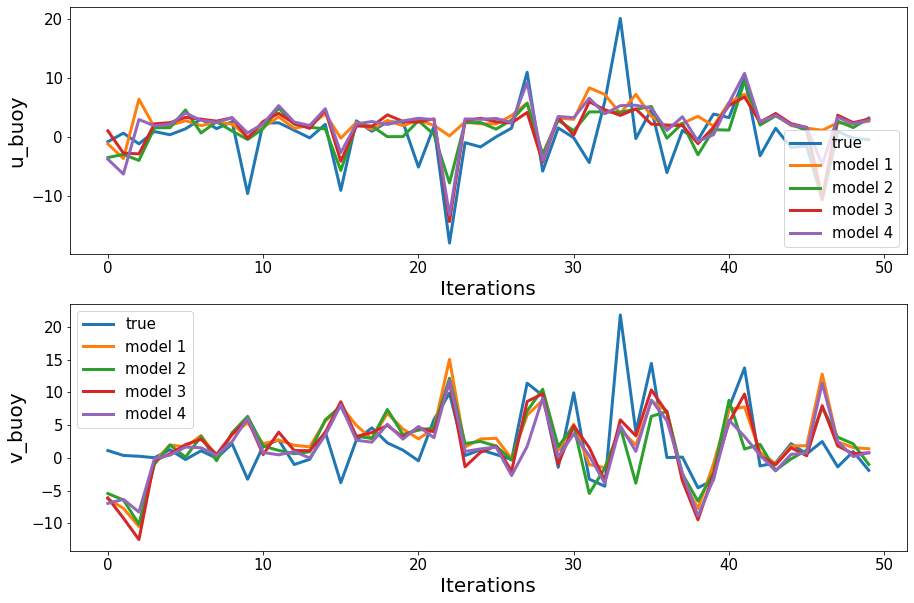

In [22]:
# Select the interval of points that you want to inspect (between 50 - 100 recommended)
beg = 0
end = 50

# Create matplotlib figure
fig, axes = plt.subplots(2, 1)

# Figure for u_buoy predictions
axes[0].plot(y_orig_true.T[0][beg:end],linewidth = 3,label="true")
axes[0].plot(y_orig_predict_mod_1.T[0][beg:end],linewidth = 3,label="model 1")
axes[0].plot(y_orig_predict_mod_2.T[0][beg:end],linewidth = 3,label="model 2")
axes[0].plot(y_orig_predict_mod_3.T[0][beg:end],linewidth = 3,label="model 3")
axes[0].plot(y_orig_predict_mod_4.T[0][beg:end],linewidth = 3,label="model 4")

axes[0].legend(fontsize=15)
axes[0].set_xlabel("Iterations",fontsize=20)
axes[0].set_ylabel("u_buoy",fontsize=20)
axes[0].tick_params(labelsize=15)

# Figure for v_buoy predictions
axes[1].plot(y_orig_true.T[1][beg:end],linewidth = 3,label="true")
axes[1].plot(y_orig_predict_mod_1.T[1][beg:end],linewidth = 3,label="model 1")
axes[1].plot(y_orig_predict_mod_2.T[1][beg:end],linewidth = 3,label="model 2")
axes[1].plot(y_orig_predict_mod_3.T[1][beg:end],linewidth = 3,label="model 3")
axes[1].plot(y_orig_predict_mod_4.T[1][beg:end],linewidth = 3,label="model 4")
axes[1].legend(fontsize=15)
axes[1].set_xlabel("Iterations",fontsize=20)
axes[1].set_ylabel("v_buoy",fontsize=20)
axes[1].tick_params(labelsize=15)

# change size figure
fig = plt.gcf()
fig.set_size_inches(15, 10)
